In [97]:
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import numpy as np


class single_var:
    '''
    Visualizations that incorporate only one variable
    '''

    def __init__(self, study):
        # figure type - for naming when saving
        self.fig_type = ''
        # study - for naming when saving
        self.study = study

    def timeseries(self, t, y, save=False, **kwargs):
        '''
        Plots a time series of the data
        - t: list of points in time - assumed to be datetime
        - y: list of dependent values - length must be that of t
        - save: whether or not to save the figure, default is False
        '''
        self.fig_type = 'ts'

        # setting up figure
        if 'figsize' in kwargs.keys():
            fig, ax = plt.subplots(figsize=kwargs['figsize'])
        else:
            fig, ax = plt.subplots(figsize=(16,8))

        # plotting data
        ax.plot(t,y,linewidth=2,color='black')
        
        # Setting limits
        ## x - should never be specified
        ax.set_xlim([t[0],t[-1]])
        ## y
        if 'ylim' in kwargs.keys():
            ax.set_ylim(kwargs['ylim'])
        else:
            ax.set_ylim([np.nanmin(y),np.nanmax(y)])
            
        # Setting ticks
        ## x - should never be specified
        ## xticks are determined based on the number of days included in t - breakpoints are shown below:
        ##  - dt(t) < 2 days - hourly
        ##  - dt(t) < 7 weeks - daily
        ##  - dt(t) < 1 year - weekly
        ##  - dt(t) < 3 years - monthly
        ##  - dt(t) > 3 years - yearly
        if t[-1] - t[0] < timedelta(days = 2):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
            ax.xaxis.set_major_locator(mdates.DayLocator())
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
            ax.xaxis.set_minor_locator(mdates.HourLocator())
        elif t[-1] - t[0] < timedelta(days = 49):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%a %d'))
            ax.xaxis.set_minor_locator(mdates.DayLocator())
        elif t[-1] - t[0] < timedelta(days = 365):
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            ax.xaxis.set_major_locator(mdates.MonthLocator())
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m/%d'))
            ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
            
        plt.xticks(rotation=-45,ha='left')
        plt.setp(ax.xaxis.get_minorticklabels(), rotation=-45, ha='left')
        ## y
        if 'yticks' in kwargs.keys():
            ax.set_yticks(kwargs['yticks'])
        else:
            # default
            pass
            
        # saving figure
        if save:
            pass


In [98]:
plotter = single_var('test')

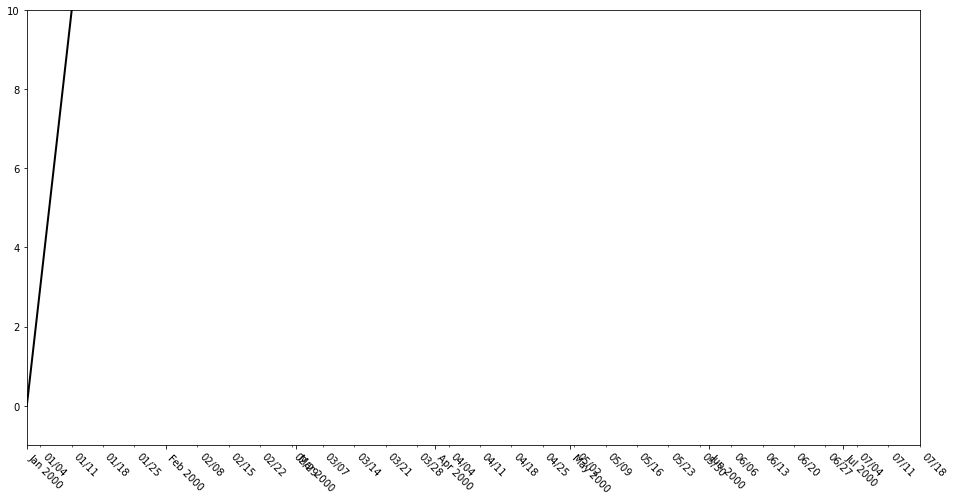

In [99]:
base = datetime(2000, 1, 1)
t = np.array([base + timedelta(days=i) for i in range(200)])
y = np.arange(0,len(t))
plotter.timeseries(t,y,ylim=[-1,10])